In [1]:
import numpy as np
import matplotlib.pyplot as plt

import openseespy.opensees as ops
import opstool as opst

In [2]:
UNIT = opst.pre.UnitSystem(length="m", force="kn", time="sec")

<font size=5> 使用 opst 命令定义截面并可视化 </font>

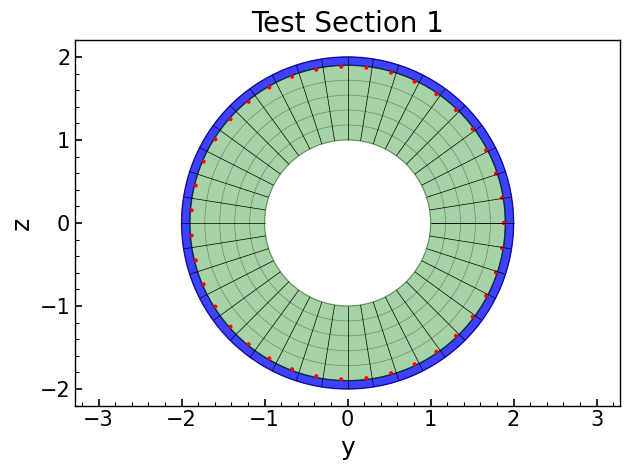

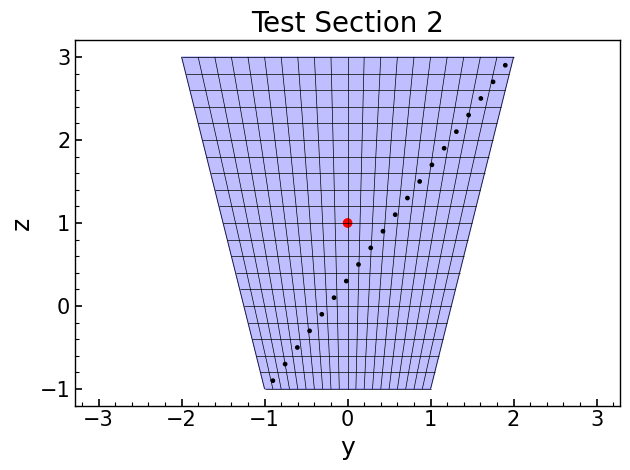

In [3]:
# ----- ----- ----- ----- -----
# 构建函数
# ----- ----- ----- ----- -----
class TestSec:
    
    # 材料标签
    matTag = 1
    # 截面标签
    secTag_1 = 1
    secTag_2 = 2
    
    # 模型域
    ops.wipe()
    ops.model("basic", "-ndm", 3, "-ndf", 6)
    # 定义材料
    ops.uniaxialMaterial("Elastic", matTag, 1000)
    
    @classmethod
    def sec_1(cls, view: bool = True) -> None:
        """
        圆截面

        Args:
            view (bool, optional): 可视化截面。
            
        Returns:
            None: 无返回值。
        """

        # 定义截面
        opst.pre.section.section("Fiber", cls.secTag_1, "-GJ", 1.0e6)
        opst.pre.section.patch("circ", cls.matTag, 40, 1, 0, 0, 1.9, 2, 0, 360, color="blue", opacity=0.75)
        opst.pre.section.patch("circ", cls.matTag, 40, 5, 0, 0, 1, 1.9, 0, 360, color="green", opacity=0.35)
        opst.pre.section.layer("circ", cls.matTag, 40, np.pi * 0.016**2, 0, 0, 1.9 - 0.016, 0.0, 360.0, color="red")

        # plot
        if view:
            opst.pre.section.plot_fiber_sec_cmds(sec_tag=cls.secTag_1, title='Test Section 1')

    @classmethod
    def sec_2(cls, view: bool = True) -> None:
        """
        矩形截面

        Args:
            view (bool, optional): 可视化截面。
            
        Returns:
            None: 无返回值
        """

        # 定义截面
        opst.pre.section.section("Fiber", cls.secTag_2, "-GJ", 1.0e6)
        opst.pre.section.patch("quad", cls.matTag, 20, 20, -1, -1, 1, -1, 2, 3, -2, 3, color="blue", opacity=0.25)
        opst.pre.section.layer("straight", cls.matTag, 20, np.pi * 0.02**2, *[-0.9, -0.9], *[1.9, 2.9], color="black")
        opst.pre.section.fiber(0, 1, np.pi * 0.05**2, cls.matTag, color="red")
        
        # plot
        if view:
            opst.pre.section.plot_fiber_sec_cmds(sec_tag=cls.secTag_2, title='Test Section 2')

# ----- ----- ----- ----- -----
# 执行构建
# ----- ----- ----- ----- -----
TestSec.sec_1()
TestSec.sec_2()

<font size=5> 多边形截面：单一材料 </font>

OPSTOOL™ :: The section Simple Rectangular Section has been successfully meshed!

                              Section Properties                               
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 1.983E-03              │ Cross-sectional area                   │
│ Asy       │ 1.653E-03              │ Shear area y-axis                      │
│ Asz       │ 1.653E-03              │ Shear area z-axis                      │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 1.625E-06              │ Moment of inertia y-axis               │
│ Iz        │ 6.610E-08              │ Moment of inertia z-axis               │
│ Iyz       │ 1.059E-21              │ Product of inertia                     │
│ Wyt       │ 3.277E-05              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 3.277E-05              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 6.610E-06              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 6.610E-06              │ Section moduli of bottom fibres z-axis │
│ J         │ 2.309E-07              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ mass      │ 1.983E-03              │ Section mass                           │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

OPSTOOL™ :: The section Simple Rectangular Section has been successfully remeshed!

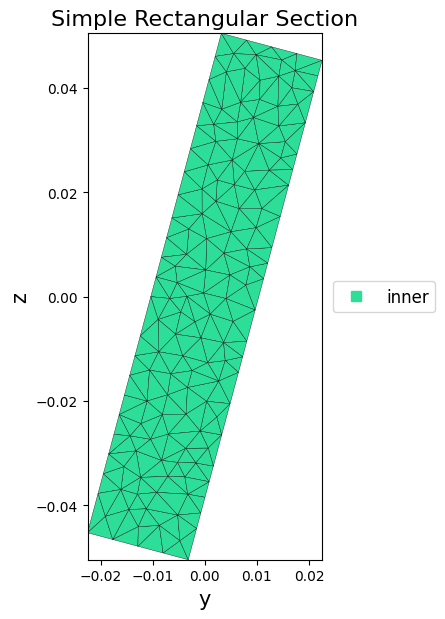

In [4]:
# ----- ----- ----- ----- -----
# 构建函数
# ----- ----- ----- ----- -----
def sec_rect(info: bool = True, view: bool = True) -> opst.pre.section.FiberSecMesh:
    
    """
    构建一个矩形截面的纤维截面网格模型。

    Args:
        info (bool, optional): 是否显示截面信息。默认值为 True。
        view (bool, optional): 是否可视化截面。默认值为 True。

    Returns:
        opst.pre.section.FiberSecMesh: 包含截面网格模型的对象。
    """
    
    # 形状参数
    W: float = 20. * UNIT.mm
    H: float = 99.157 * UNIT.mm
    
    # 内部材料标签
    innerTag = 1
    # 截面标签
    secTag = 1

    # 轮廓线
    sec_outlines = [(0, 0), (W, 0), (W, H), (0, H)]
    # 生成几何形状
    inner_geo = opst.pre.section.create_polygon_patch(sec_outlines)
    
    # 截面网格
    SEC = opst.pre.section.FiberSecMesh(sec_name="Simple Rectangular Section")
    SEC.add_patch_group({"inner": inner_geo})
    SEC.set_mesh_size({"inner": 0.005})
    SEC.set_ops_mat_tag({"inner": innerTag}) # 明确材料编号

    # 生成网格
    SEC.mesh()
    SEC.centring()

    # 获取截面信息
    sec_props = SEC.get_sec_props(display_results=info) # 截面信息
    
    # 定义材料
    ops.uniaxialMaterial("Elastic", innerTag, 1000)
    
    # 定义截面
    SEC.to_opspy_cmds(secTag=secTag, G=100. * UNIT.gpa)
    
    # 旋转截面
    SEC.rotate(15, remesh=True)
    
    # 可视化 截面
    if view:
        plt.close('all')
        SEC.view(fill=True, show_legend=True)
        plt.show()
    
    return SEC

# ----- ----- ----- ----- -----
# 执行构建
# ----- ----- ----- ----- -----
ops.wipe()
ops.model("basic", "-ndm", 3, "-ndf", 6)
SEC = sec_rect()

<font size=5> 型钢截面 </font>

OPSTOOL™ :: The section I Section has been successfully meshed!

                              Section Properties                               
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 1.656E+01              │ Cross-sectional area                   │
│ Asy       │ 8.604E+00              │ Shear area y-axis                      │
│ Asz       │ 8.751E+00              │ Shear area z-axis                      │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 2.343E+02              │ Moment of inertia y-axis               │
│ Iz        │ 2.726E+01              │ Moment of inertia z-axis               │
│ Iyz       │ -1.936E-14             │ Product of inertia                     │
│ Wyt       │ 4.687E+01              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 4.687E+01              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 7.788E+00              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 7.788E+00              │ Section moduli of bottom fibres z-axis │
│ J         │ 4.274E+00              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ mass      │ 1.656E+01              │ Section mass                           │
│ rho_rebar │ 0.000E+00              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

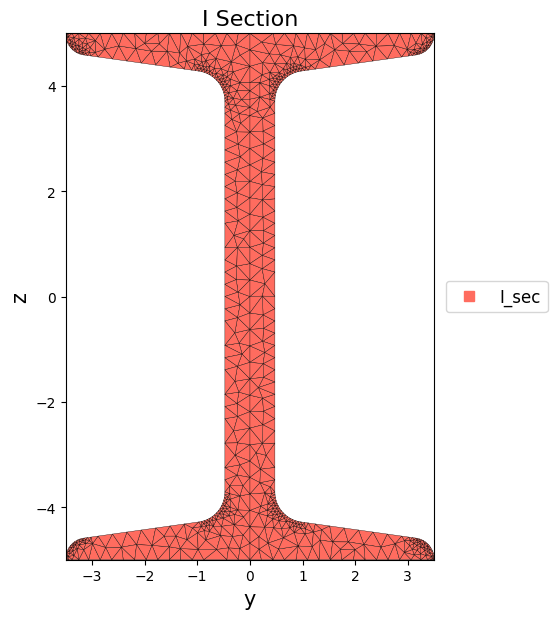

In [ ]:
from sectionproperties.pre.library import steel_sections
# ----- ----- ----- ----- -----
# 构建函数
# ----- ----- ----- ----- -----
def sec_I(info: bool = True, view: bool = True) -> opst.pre.section.FiberSecMesh:
    
    """
    构建一个工型钢纤维截面网格模型。

    Args:
        info (bool, optional): 是否显示截面信息。默认值为 True。
        view (bool, optional): 是否可视化截面。默认值为 True。

    Returns:
        opst.pre.section.FiberSecMesh: 包含截面网格模型的对象。
    """
    
    # 内部材料标签
    steelTag = 1
    # 截面标签
    secTag = 1

    # 工型钢形状
    geom_half = steel_sections.tapered_flange_channel(
        d=10, b=3.5,
        t_f=0.575, t_w=0.475,
        r_r=0.575, r_f=0.4,
        alpha=8,
        n_r=16,
        )
    I_geom = geom_half + geom_half.mirror_section(axis="y", mirror_point=(0, 0)) # 镜像叠加
    
    # 截面网格
    SEC = opst.pre.section.FiberSecMesh(sec_name="I Section")
    SEC.add_patch_group({"I_sec": I_geom})
    SEC.set_mesh_size({"I_sec": 0.3})
    SEC.set_ops_mat_tag({"I_sec": steelTag}) # 明确材料编号

    # 生成网格
    SEC.mesh()
    SEC.centring()

    # 获取截面信息
    sec_props = SEC.get_sec_props(display_results=info) # 截面信息
    
    # 定义材料
    ops.uniaxialMaterial("Steel02", steelTag, 400. * UNIT.mpa, 200. * UNIT.gpa, 0.01)
    
    # 定义截面
    SEC.to_opspy_cmds(secTag=secTag, G=100. * UNIT.gpa)
    
    # 可视化 截面
    if view:
        plt.close('all')
        SEC.view(fill=True, show_legend=True)
        plt.show()
    
    return SEC

# ----- ----- ----- ----- -----
# 执行构建
# ----- ----- ----- ----- -----
ops.wipe()
ops.model("basic", "-ndm", 3, "-ndf", 6)
SEC = sec_I()

<font size=5> 多边形截面：钢筋混凝土 </font>

OPSTOOL™ :: The section XingNing Pier Section has been successfully meshed!

                              Section Properties                               
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 1.080E+00              │ Cross-sectional area                   │
│ Asy       │ 7.933E-01              │ Shear area y-axis                      │
│ Asz       │ 7.643E-01              │ Shear area z-axis                      │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 1.469E-01              │ Moment of inertia y-axis               │
│ Iz        │ 8.010E-02              │ Moment of inertia z-axis               │
│ Iyz       │ 1.325E-18              │ Product of inertia                     │
│ Wyt       │ 2.675E-01              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 1.833E-01              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 1.456E-01              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 1.456E-01              │ Section moduli of bottom fibres z-axis │
│ J         │ 1.247E-01              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ mass      │ 1.080E+00              │ Section mass                           │
│ rho_rebar │ 1.478E-02              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

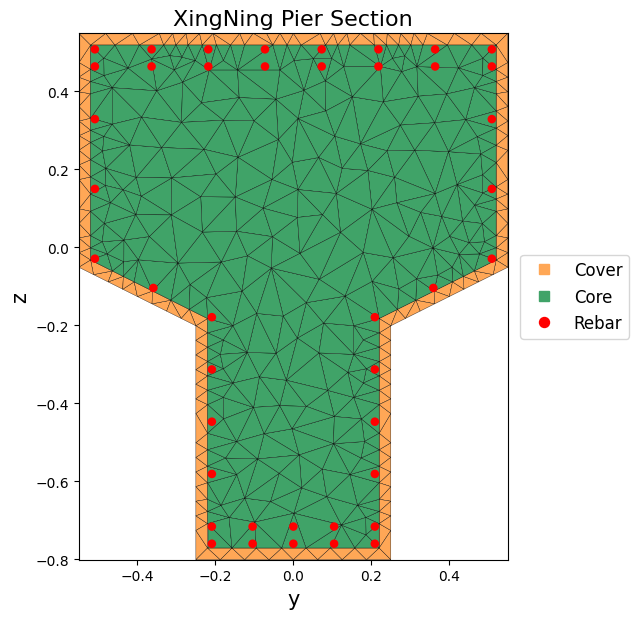

In [ ]:
# ----- ----- ----- ----- -----
# 构建函数
# ----- ----- ----- ----- -----
def sec_polygonal(info: bool = True, view: bool = True) -> opst.pre.section.FiberSecMesh:
    
    """
    构建一个兴宁桥盖梁纤维截面网格模型。

    Args:
        info (bool, optional): 是否显示截面信息。默认值为 True。
        view (bool, optional): 是否可视化截面。默认值为 True。

    Returns:
        opst.pre.section.FiberSecMesh: 包含截面网格模型的对象。
    """
    
    # 形状参数
    bar_dia: float = 22. * UNIT.mm
    cover: float = 3. * UNIT.cm
    H1: float = 600. * UNIT.mm
    H2: float = 750. * UNIT.mm
    H3: float = 1350. * UNIT.mm
    W1: float = 500.* UNIT.mm
    W2: float = 1100. * UNIT.mm
    
    # 材料标签
    coverTag = 1
    coreTag =2
    barTag = 3
    # 截面标签
    secTag = 1

    # 轮廓线
    sec_outlines = [
        (W1 / 2., 0.),
        (W1 / 2., H1),
        (W2 / 2., H2),
        (W2 / 2., H3),
        
        (-W2 / 2., H3),
        (-W2 / 2., H2),
        (-W1 / 2., H1),
        (-W1 / 2., 0.),
        ]
    cover_outlines = opst.pre.section.offset(sec_outlines, d=cover) # 保护层线

    # 生成几何形状
    cover_geo = opst.pre.section.create_polygon_patch(outline=sec_outlines, holes=[cover_outlines])
    core_geo = opst.pre.section.create_polygon_patch(outline=cover_outlines)

    # 截面网格
    SEC = opst.pre.section.FiberSecMesh(sec_name='XingNing Pier Section')
    SEC.add_patch_group({"Cover": cover_geo, "Core": core_geo})
    SEC.set_mesh_size({"Cover": 0.1, "Core": 0.1})
    SEC.set_mesh_color({"Cover": "#ffa756", "Core": "#40a368"})
    SEC.set_ops_mat_tag({"Cover": coverTag, "Core": coreTag}) # 明确材料编号
    
    # 底层添加钢筋
    SEC.add_rebar_line(
        points=[
            (-(W1 / 2. - cover - bar_dia / 2.), cover + bar_dia / 2.),
            (W1 / 2. - cover - bar_dia / 2., cover + bar_dia / 2.)
            ],
        dia=bar_dia, n=5,
        ops_mat_tag=barTag, color='red'
        )
    SEC.add_rebar_line(
        points=[
            (-(W1 / 2. - cover - bar_dia / 2.), cover + bar_dia * 2.5),
            (W1 / 2. - cover - bar_dia / 2., cover + bar_dia * 2.5)
            ],
        dia=bar_dia, n=5,
        ops_mat_tag=barTag, color='red'
        )
    # 添加顶层钢筋
    SEC.add_rebar_line(
        points=[
            (-(W2 / 2. - cover - bar_dia / 2.), H3 - cover - bar_dia / 2.),
            (W2 / 2. - cover - bar_dia / 2., H3 - cover - bar_dia / 2.)
            ],
        dia=bar_dia, n=8,
        ops_mat_tag=barTag, color='red'
        )
    SEC.add_rebar_line(
        points=[
            (-(W2 / 2. - cover - bar_dia / 2.), H3 - cover - bar_dia * 2.5),
            (W2 / 2. - cover - bar_dia / 2., H3 - cover - bar_dia * 2.5)
            ],
        dia=bar_dia, n=8,
        ops_mat_tag=barTag, color='red'
        )
    # 添加中层钢筋(右侧)
    SEC.add_rebar_line(
        points=[
            (W2 / 2. - cover - bar_dia / 2., H3 - bar_dia * 10.),
            (W2 / 2. - cover - bar_dia / 2., H2 + bar_dia),
            (W1 / 2. - cover - bar_dia / 2., H1 + bar_dia),
            (W1 / 2. - cover - bar_dia / 2., 0. + bar_dia * 10.)
            ],
        dia=bar_dia, n=8,
        ops_mat_tag=barTag, color='red'
        )
    # 添加中层钢筋(左侧)
    SEC.add_rebar_line(
        points=[
            (-(W2 / 2. - cover - bar_dia / 2.), H3 - bar_dia * 10.),
            (-(W2 / 2. - cover - bar_dia / 2.), H2 + bar_dia),
            (-(W1 / 2. - cover - bar_dia / 2.), H1 + bar_dia),
            (-(W1 / 2. - cover - bar_dia / 2.), 0. + bar_dia * 10.)
            ],
        dia=bar_dia, n=8,
        ops_mat_tag=barTag, color='red'
        )
    
    # 生成网格
    SEC.mesh()
    SEC.centring()

    # 获取截面信息
    sec_props = SEC.get_sec_props(display_results=info) # 截面信息
    
    # 定义材料
    ops.uniaxialMaterial("Elastic", coverTag, 1000)
    ops.uniaxialMaterial("Elastic", coreTag, 1000)
    ops.uniaxialMaterial("Elastic", barTag, 1000)
    
    # 定义截面
    SEC.to_opspy_cmds(secTag=secTag, G=100. * UNIT.gpa)
    
    # 可视化 截面
    if view:
        plt.close('all')
        SEC.view(fill=True, show_legend=True)
        plt.show()
    
    return SEC

# ----- ----- ----- ----- -----
# 执行构建
# ----- ----- ----- ----- -----
ops.wipe()
ops.model("basic", "-ndm", 3, "-ndf", 6)
SEC = sec_polygonal()

<font size=5> 圆截面：钢筋混凝土 </font>

OPSTOOL™ :: The section RC Circle Section has been successfully meshed!

                              Section Properties                               
┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Symbol    ┃ Value                  ┃ Definition                             ┃
┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ A         │ 1.871E+00              │ Cross-sectional area                   │
│ Asy       │ 1.385E+00              │ Shear area y-axis                      │
│ Asz       │ 1.385E+00              │ Shear area z-axis                      │
│ centroid  │ (0.000E+00, 0.000E+00) │ Elastic centroid                       │
│ Iy        │ 3.158E-01              │ Moment of inertia y-axis               │
│ Iz        │ 3.158E-01              │ Moment of inertia z-axis               │
│ Iyz       │ -9.866E-18             │ Product of inertia                     │
│ Wyt       │ 3.969E-01              │ Section moduli of top fibres y-axis    │
│ Wyb       │ 3.969E-01              │ Section moduli of bottom fibres y-axis │
│ Wzt       │ 3.947E-01              │ Section moduli of top fibres z-axis    │
│ Wzb       │ 3.947E-01              │ Section moduli of bottom fibres z-axis │
│ J         │ 6.314E-01              │ Torsion constant                       │
│ phi       │ 0.000E+00              │ Principal axis angle                   │
│ mass      │ 1.871E+00              │ Section mass                           │
│ rho_rebar │ 1.053E-02              │ Ratio of reinforcement                 │
└───────────┴────────────────────────┴────────────────────────────────────────┘

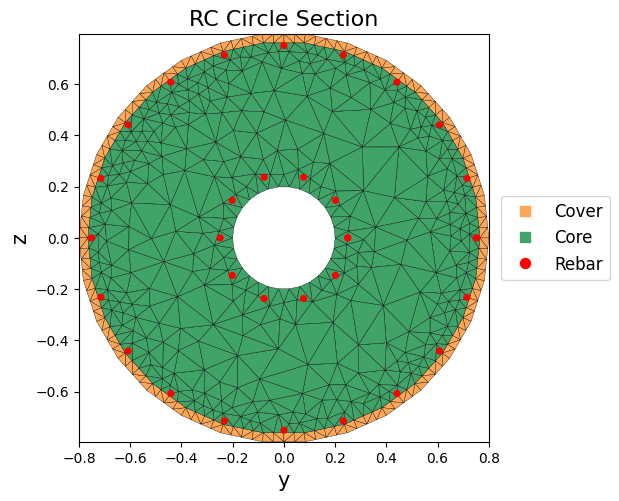

In [ ]:
# ----- ----- ----- ----- -----
# 构建函数
# ----- ----- ----- ----- -----
def sec_circle(info: bool = True, view: bool = True) -> opst.pre.section.FiberSecMesh:
    
    """
    构建一个圆截面的纤维截面网格模型，包含保护层和内孔，以及钢筋。

    Args:
        info (bool, optional): 是否显示截面信息。默认值为 True。
        view (bool, optional): 是否可视化截面。默认值为 True。

    Returns:
        opst.pre.section.FiberSecMesh: 包含截面网格模型的对象。
    """
    
    # 形状参数
    bar_dia: float = 28 * UNIT.mm
    cover: float = 3.5 * UNIT.cm
    R: float = 80. * UNIT.cm
    r: float = 20. * UNIT.cm
    
    # 材料标签
    coverTag = 1
    coreTag =2
    barTag = 3
    # 截面标签
    secTag = 1

    # 轮廓线
    cover_outline = opst.pre.section.create_circle_points(xo=[0, 0], radius=R - cover, n_sub=30) # 保护层轮廓线
    inner_outline = opst.pre.section.create_circle_points(xo=[0, 0], radius=r, n_sub=30) # 内孔轮廓线
    # 生成网格形状
    cover_geo = opst.pre.section.create_circle_patch(xo=[0, 0], radius=R, holes=[cover_outline], n_sub=30) # 保护层几何形状
    core_geo = opst.pre.section.create_circle_patch(xo=[0, 0], radius=R - cover, holes=[inner_outline], n_sub=30) # 核心几何形状

    # 截面网格
    SEC = opst.pre.section.FiberSecMesh(sec_name='RC Circle Section')
    SEC.add_patch_group({"Cover": cover_geo, "Core": core_geo})
    SEC.set_mesh_color({"Cover": "#ffa756", "Core": "#40a368"})
    SEC.set_ops_mat_tag({"Cover": coverTag, "Core": coreTag}) # 明确材料编号
    
    # 添加钢筋
    SEC.add_rebar_circle(
        xo=[0, 0], radius=R - cover - bar_dia / 2.,
        dia=bar_dia, n=21,
        ops_mat_tag=barTag, color='red')
    SEC.add_rebar_circle(
        xo=[0, 0], radius=r + cover + bar_dia / 2.,
        dia=bar_dia, n=11,
        ops_mat_tag=barTag, color='red')

    # 生成网格
    SEC.mesh()
    SEC.centring()

    # 获取截面信息
    sec_props = SEC.get_sec_props(display_results=info) # 截面信息
    
    # 定义材料
    ops.uniaxialMaterial("Elastic", coverTag, 1000)
    ops.uniaxialMaterial("Elastic", coreTag, 1000)
    ops.uniaxialMaterial("Elastic", barTag, 1000)
    
    # 定义截面
    SEC.to_opspy_cmds(secTag=secTag, G=100. * UNIT.gpa)
    
    # 可视化 截面
    if view:
        plt.close('all')
        SEC.view(fill=True, show_legend=True)
        plt.show()
    
    return SEC

# ----- ----- ----- ----- -----
# 执行构建
# ----- ----- ----- ----- -----
ops.wipe()
ops.model("basic", "-ndm", 3, "-ndf", 6)
SEC = sec_circle()